# 050 Using Matplotlib

> COM6018

*Copyright &copy; 2023, 2024 Jon Barker, University of Sheffield. All rights reserved*.


In this lab class we are going to get practice with using Matplotlib. We will be using the [Matplotlib documentation](https://matplotlib.org/3.1.1/contents.html) and the Introducing Matplotlib notebook as a reference.

The lab class is organised as a sequence of exercises. For each one you are provided with a dataset and an image of a plot of the data. Your task is to write code to reproduce the plot as closely as possible. After the lab class the solution code will be released so you can check your answers. The exercises start with simple plots and get progressively more complex.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Plot 1 - Simple line plot

The first plot is a simple line plot. The plot, shown below, shows worldwide renewable energy consumption from 1989 to 2022. The data for the plot is in file `data/renewable_energy.csv`. Your task is to write code to reproduce the plot as closely as possible.

Some hints:
- You will need to filter the pandas dataframe to select only the data for the 'World' region.
- You can read the data using pandas `read_csv` function.
- The plotting can be done with a series of calls to `plt.plot`.
- Getting the grid lines right is is a bit tricky. You'll need to to use the 'plt.grid' function and `plt.yticks` to set the spacing of major and minor tick marks.

Write your code in the cell below. Run the cell to display your plot and make adjustments to the code until it matches the target plot.

<img src="figures/energy.png" alt="plot1" style="width: 500px;"/>


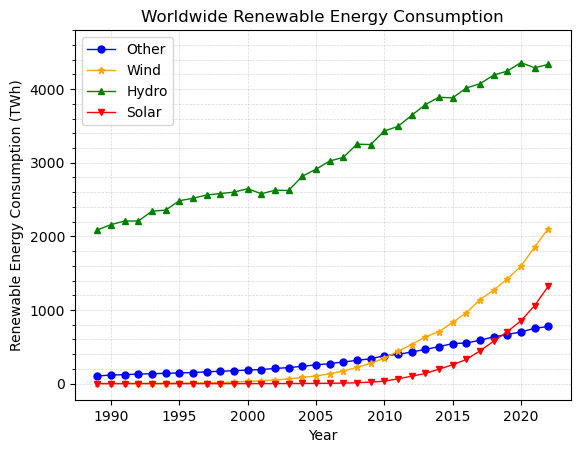

In [3]:
# SOLUTION

df = pd.read_csv('data/renewable_energy.csv')

df = df[df['Entity'] == 'World']

plt.plot(df['Year'], df['Other'], label='Other', marker='o', color='blue', linewidth=1, markersize=5)
plt.plot(df['Year'], df['Wind'], label='Wind', marker='*', color='orange', linewidth=1, markersize=5)
plt.plot(df['Year'], df['Hydro'], label='Hydro', marker='^', color='green', linewidth=1, markersize=5)
plt.plot(df['Year'], df['Solar'], label='Solar', marker='v', color='red', linewidth=1, markersize=5)

plt.xlabel('Year')

major_ticks = np.arange(0, 5000, 1000)
minor_ticks = np.arange(0, 5000, 200)
plt.yticks(major_ticks)
plt.yticks(minor_ticks, minor=True)
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3)

plt.ylabel('Renewable Energy Consumption (TWh)')
plt.title('Worldwide Renewable Energy Consumption')
plt.legend()

plt.savefig('figures/energy.png', dpi=600)


### Plot 1b - Using subplots

The second plot uses the same data but uses subplots to compare energy consumption for the world, the EU and the UK.

Hints:
- Start with the command `plt.figure(figsize=(15, 5))` to set the size of the figure.
- You can use the `plt.subplot` command to place the subplots on a 1x3 grid.
- Write a function to generate each subplot, i.e. the function can take a filtered version of the dataframe and a title string as arguments.



<img src="figures/energy_subplots.png" alt="plot1b" style="width: 700px;"/>



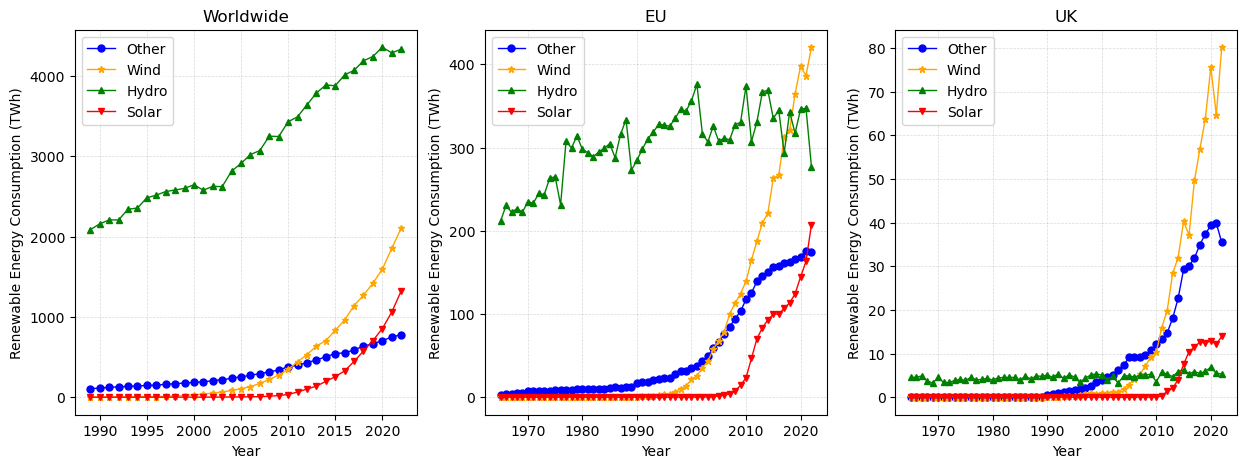

In [4]:
# SOLUTION

def make_renewable_plot(df, title):

    plt.plot(df['Year'], df['Other'], label='Other', marker='o', color='blue', linewidth=1, markersize=5)
    plt.plot(df['Year'], df['Wind'], label='Wind', marker='*', color='orange', linewidth=1, markersize=5)
    plt.plot(df['Year'], df['Hydro'], label='Hydro', marker='^', color='green', linewidth=1, markersize=5)
    plt.plot(df['Year'], df['Solar'], label='Solar', marker='v', color='red', linewidth=1, markersize=5)
    plt.xlabel('Year')
    max_value = max(df['Other'].max(), df['Wind'].max(), df['Hydro'].max(), df['Solar'].max())
    plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3)
    plt.ylabel('Renewable Energy Consumption (TWh)')
    plt.title(title)
    plt.legend()

df = pd.read_csv('data/renewable_energy.csv')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
make_renewable_plot(df[df['Entity'] == 'World'], 'Worldwide')
plt.subplot(1, 3, 2)
make_renewable_plot(df[df['Entity'] == 'EU'], 'EU')
plt.subplot(1, 3, 3)
make_renewable_plot(df[df['Entity'] == 'UK'], 'UK')

plt.savefig('figures/energy_subplots.png', dpi=600)



## Plot 2 - Stackplot and pie charts

The next plot shows the same worldwide energy consumption data but this time as a 'stackplot'. There are also two pie charts showing the proportion of energy of each type in 1989 and 2022.

Hints:
- The layout can be made using plt.subplot.
- You can use the `plt.stackplot` function to generate the stackplot. Check the matlplot lib documentation for details.
- The pie charts can be made with `plt.pie`. Again, check the documentation for details.
- You will need to retrieve the first and last value in each data series to use as the data for the pie charts (i.e. 1989 and 2022). You can do this using the `iloc` method of the dataframe.
- Note, the first pie chart groups wind, solar and other into 'all other'.

<img src="figures/energy_stacked.png" alt="plot2" style="width: 500px;"/>


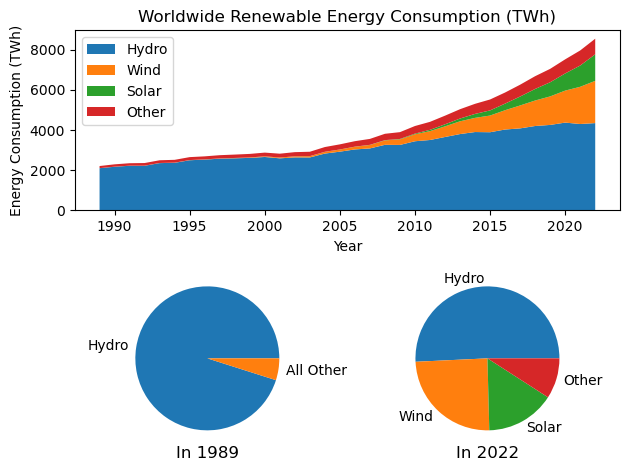

In [5]:
# SOLUTION

df = pd.read_csv('data/renewable_energy.csv')

df = df[df['Entity'] == 'World']

plt.subplot(2, 1, 1)

plt.stackplot(df['Year'],  df['Hydro'], df['Wind'], df['Solar'], df['Other'], labels=['Hydro', 'Wind', 'Solar', 'Other'])
plt.ylabel('Energy Consumption (TWh)')
plt.xlabel('Year')
plt.title('Worldwide Renewable Energy Consumption (TWh)')
plt.legend(loc='upper left')
plt.subplot(2, 2, 3)
plt.pie([df.iloc[0]['Hydro'], df.iloc[0]['Wind'] + df.iloc[0]['Solar'] + df.iloc[0]['Other']], labels=['Hydro', 'All Other'])
plt.title('In 1989', y=-0.1)
plt.subplot(2, 2, 4)
plt.pie([df.iloc[-1]['Hydro'], df.iloc[-1]['Wind'], df.iloc[-1]['Solar'], df.iloc[-1]['Other']], labels=['Hydro', 'Wind', 'Solar', 'Other'])
plt.title('In 2022', y=-0.1)
plt.tight_layout()

plt.savefig('figures/energy_stacked.png', dpi=600)


## Plot 3 - Grid of scatter plots

The next plot illustrates a famous dataset known as the 'iris' dataset. The dataset contains measurements of the sepal and petal length and width for three species of iris flower. This dataset was first published in 1936 by the British statistician and biologist Ronald Fisher. The dataset is widely used in machine learning and data science to illustrate classification and clustering algorithms.

The plot shows a grid of scatter plots comparing each pair of measurements. The data is in file `data/iris.csv`.

This plot is a bit more complex than the previous ones. 

Hints:
- Write a function that can generate each subplot. The function should take the dataframe and the column names for the x and y axes as arguments.
- Use a nested loop to loop over all combinations of x and y axes.
- Note, the legend has only been placed on the diagonal subplots where it doesn't overlap with the data.
- You can use the `plt.tight_layout()` function as the final command to ensure that the subplot axes titles don't overlap other subplots.

<img src="figures/iris_scatter.png" alt="plot3" style="width: 700px;"/>


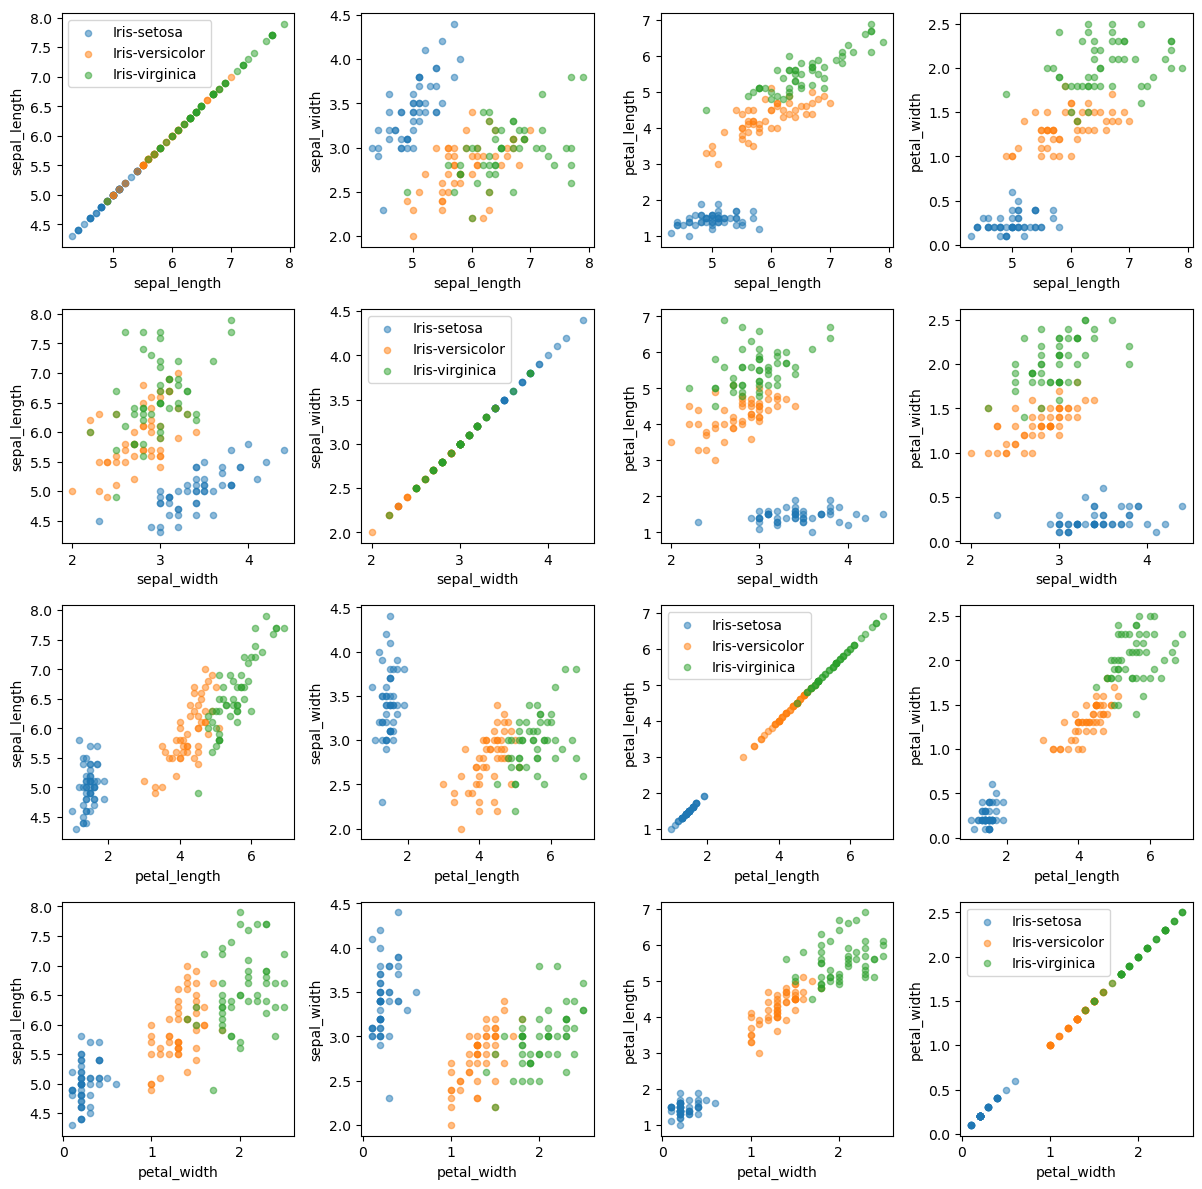

In [6]:
# SOLUTION

df = pd.read_csv('data/iris.csv')

def plot_scatter(df, x, y):
    for species in df['species'].unique():
        plt.scatter(df[df['species'] == species][x], df[df['species'] == species][y], label=species, marker='o', s=20, alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    if x == y:
        plt.legend()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plot_no = 0
plt.figure(figsize=(12, 12))
for f1 in features:
    for f2 in features:
        plot_no += 1
        plt.subplot(4, 4, plot_no)
        plot_scatter(df, f1, f2)
plt.tight_layout()

plt.savefig('figures/iris_scatter.png', dpi=600)

## Plot 4 - Geographic data plot


The next plot is showing the location and generation capacity of wind farms in the UK. The data is in file `data/wind_farms.csv`. The plot is basically a scatter plot but the points are shown over a map of the UK. This has been achieved using the `cartopy` package for plotting geographic data.

The first lines of the solution are as follows

```python
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df = pd.read_csv('data/wind_farms_uk.csv')
fig = plt.figure(figsize=(8, 8))

ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-11, 3, 49.3, 60], crs=ccrs.PlateCarree())

```

You will now need to use the `ax.scatter` function to plot the wind farm locations.

Hints:
- The area of the circles is proportional to squareroot of the wind farm capacity.
- You will need to use `ax.scatter` with the parameter 'transform=ccrs.PlateCarree()' 
- You will need to read the https://scitools.org.uk/cartopy documentation to see how to shade the land and sea.
- The legend in the bottom left corner is quite tricky to generate. It can be made by placing invisible 'dummy' points on the plot that have labels attached. Try Googling for a solution but don't worry if you can't get this bit to work, wait for the solution code to be released.


<img src="figures/wind_farms.png" alt="plot4" style="width: 500px;"/>


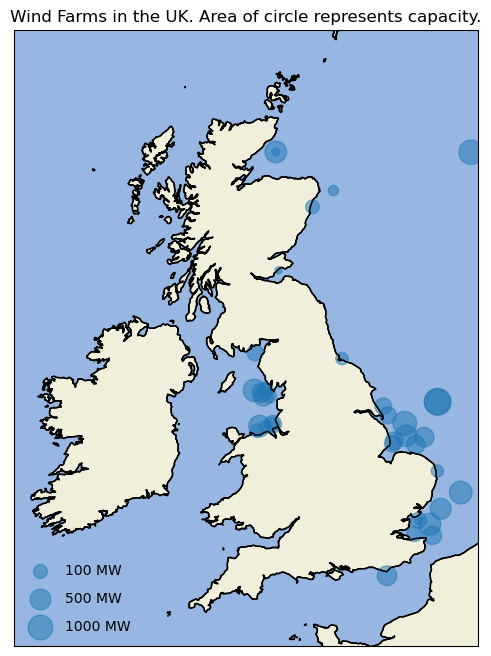

In [43]:
# SOLUTION 

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(8, 8))

df = pd.read_csv('data/wind_farms_uk.csv')

ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-11, 3, 49.3, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax.add_feature(cfeature.OCEAN, zorder=1, edgecolor='k')
marker_sizes = np.sqrt(df['capacity'].values) * 10

ax.scatter(df['longitude'].values, 
           df['latitude'].values,  
           transform=ccrs.PlateCarree(), 
           s=marker_sizes, 
           alpha=0.5)

plt.title('Wind Farms in the UK. Area of circle represents capacity.')
for a in [100, 500, 1000]:
    plt.scatter([], [], c='#1f77b4', alpha=0.5, s=np.sqrt(a)*10,
                label=str(a) + ' MW')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left')

plt.savefig('figures/wind_farms.png', dpi=600)


## Plot 5 - Contour plot of function

The last example is a contour plot of the function is $f(x,y) = sin(4x) + cos(xy)$

This looks complicated but can actually be made with just a few lines of code. If you are unsure on how to proceed then check the contour plot example in the course notes.

Hints:
- Use `np.meshgrid` to generate the x and y coordinates.
- Use `plt.contour` to generate the contour plot.
- Use `plt.clabel` to add the contour labels.
- The plot is using the colourmap called 'RdBu' which use red to represent low values and blue to represent high values.
- Write a Python function called 'f' to compute the function values for each x and y coordinate. This will make the code easier to read. This function should take a pair of numpy arrays to represent the x and y coordinates of all the points that need to be computed and return the function values as a numpy array. (The x and y arrays can be generated using `np.meshgrid`.)

You can easily change the function to plot by changing the definition of the function 'f'. By using sines and cosines of different sums, products and powers of x and y you can generate a wide range of interesting patterns.

<img src="figures/contours.png" alt="plot5" style="width: 600px;"/>


In [ ]:
# SOLUTION

def f(x, y):
    return np.sin(x*4) + np.cos(y*x)

xs, ys = np.meshgrid(np.linspace(-3.0, 3.0, 200), np.linspace(-3.0, 3.0, 200))
cs = plt.contour(xs, ys, f(xs, ys), 10, cmap='RdBu')
plt.clabel(cs, cs.levels, inline=True, fontsize=6)
plt.title('Contour plot of $sin(4x) + cos(xy)$')

plt.savefig('figures/contours.png', dpi=600)
